1- Abrindo e exibindo informações do arquivo "train.csv"

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns


df_train = pd.read_csv("C:/Users/Usuario/Downloads/train.csv")
df_train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


2- Análise dos dados

In [120]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

2- Tratando colunas "Age", "Cabin", "Embarked", "PassengerId", "Name" e "Ticket"

In [153]:
#Assumindo valores médios para os valores "NaN" da coluna "Age" 
df_train = df_train.fillna({"Age":df_train["Age"].mean()})
#Removendo a coluna "Cabin", pois há múitos valores núlos
df_train.drop("Cabin", axis=1, inplace=True)
#Aplicando a moda para os valores nulos de "Embarked"
df_train = df_train.fillna({"Embarked":df_train["Embarked"].mode()[0]})
#Removendo a coluna "Ticket", "Name" e "PassengerId", já que não apresentam relevância para a taxa de sobrevivência"
df_train.drop("Ticket", axis=1, inplace=True)
df_train.drop("PassengerId", axis=1, inplace=True)
df_train.drop("Name", axis=1, inplace=True)

df_train.tail(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.000000,0,0,13.00,S
887,1,1,female,19.000000,0,0,30.00,S
888,0,3,female,29.699118,1,2,23.45,S
889,1,1,male,26.000000,0,0,30.00,C
890,0,3,male,32.000000,0,0,7.75,Q


3- Análise estatística dos dados

In [154]:
#Variáveis núméricas
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [155]:
#Variáveis categóricas
df_train.describe(include=np.dtype(object))

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


Anomálias:
1. Pessoa com 0.4 anos.
2. Passageiro entrou sem pagar mas foi registrado.
3. Uma pessoa com 80 anos e outra que pagou 512 Libras, podem se tornar valores destoante.
4. Tranformar "Sex" e "Embarked" para valores numéricos, afim de melhorar a visualização do algoritimo.

4- Transformando as coluna categóricas para numéricas


In [190]:
#Transformando coluna "Sex"
Sex = df_train["Sex"]
for N in range (len(Sex)):
    if Sex[N] == "male":
        df_train.loc[N,"Sex"] = 0
    elif Sex[N] == "female":
        df_train.loc[N,"Sex"] = 1
    else:
        pass
df_train["Sex"] = df_train["Sex"].astype(int)

#Transformando coluna "Embarked"
Embarked = df_train["Embarked"]
for N in range (len(Embarked)):
    if Embarked[N] == "Q":
        df_train.loc[N,"Embarked"] = 0
    elif Embarked[N] == "S":
        df_train.loc[N,"Embarked"] = 1
    elif Embarked[N] == "C":
        df_train.loc[N,"Embarked"] = 2
    else:
        pass
df_train["Embarked"] = df_train["Embarked"].astype(int)

5- Vizualizando dados

<Axes: xlabel='Fare', ylabel='Count'>

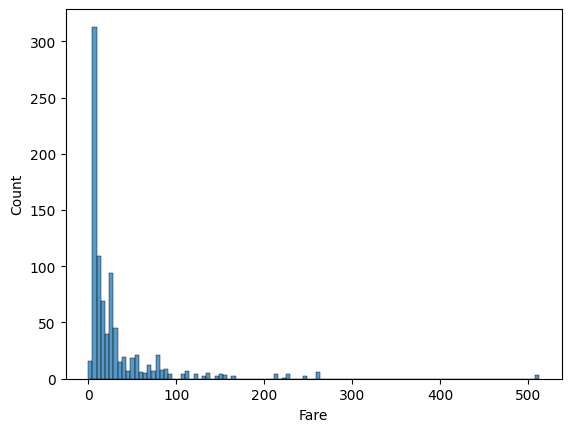

In [134]:
sns.histplot(df_train, x="Fare")

Tratamento: diminuindo as distorções acima de 200 libras

In [136]:
#assumi um valor mediano de 150 e apliquei as valores superiores, os inferiores, assimi o valor da média
for N in range (890):
    if df_train.loc[N,"Fare"] > 150:
        df_train.loc[N,"Fare"] = 150
    elif df_train.loc[N,"Fare"] == 0:
        df_train.loc[N,"Fare"] = 29.249672
    else:
        pass
    
df_train["Fare"].describe()     

count    891.000000
mean      29.742090
std       33.900535
min        4.012500
25%        7.925000
50%       15.100000
75%       31.000000
max      150.000000
Name: Fare, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

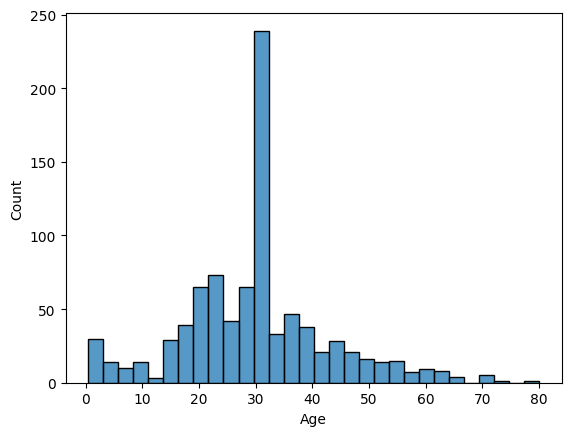

In [137]:
sns.histplot(df_train, x="Age")

Tratamento: Diminuindo a disperção das bordas

In [138]:
#tratei esses valores por somar e subtrair o desvio padrão
for N in range (890):
    if df_train.loc[N,"Age"] > 60:
        df_train.loc[N,"Age"] = df_train.loc[N,"Age"] - 13.002015
        
    elif df_train.loc[N,"Age"] < 1:
        df_train.loc[N,"Age"] = df_train.loc[N,"Age"] + 13.002015
        
    else:
        pass
    
df_train["Age"].describe()

count    891.000000
mean      29.480229
std       12.051598
min        1.000000
25%       22.000000
50%       29.699118
75%       35.000000
max       66.997985
Name: Age, dtype: float64

<Axes: >

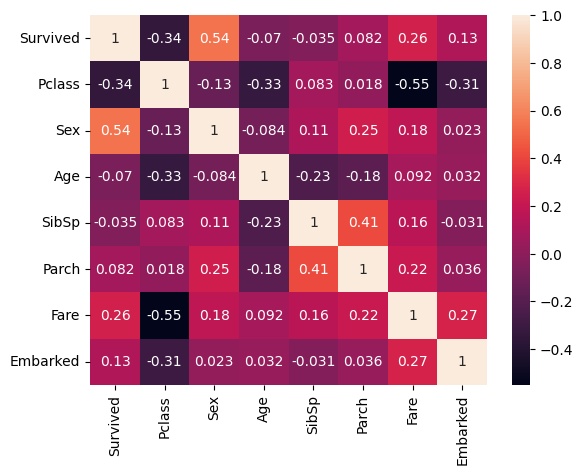

In [191]:
sns.heatmap(df_train.corr(), annot=True)